In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"Downloads/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


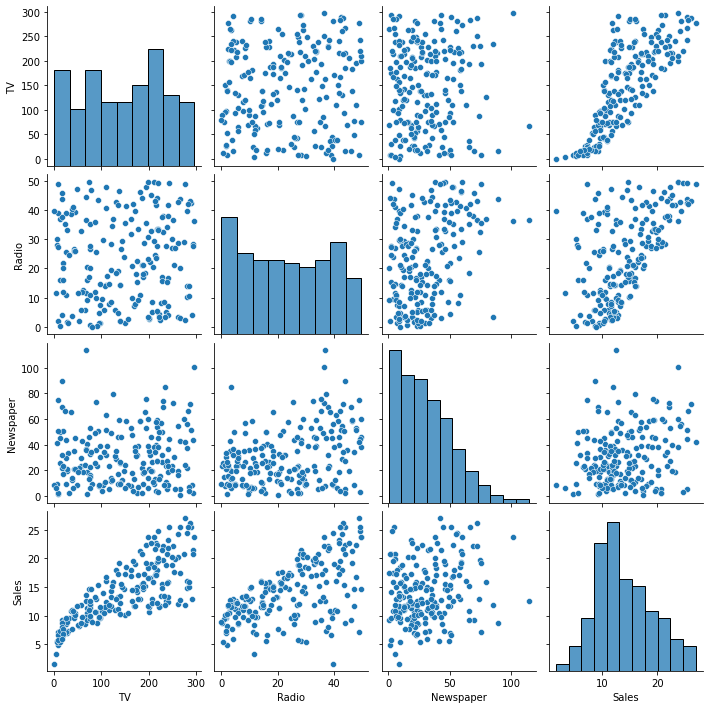

In [8]:
sns.pairplot(df)

# Assumptions for Linear Regression

1.Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


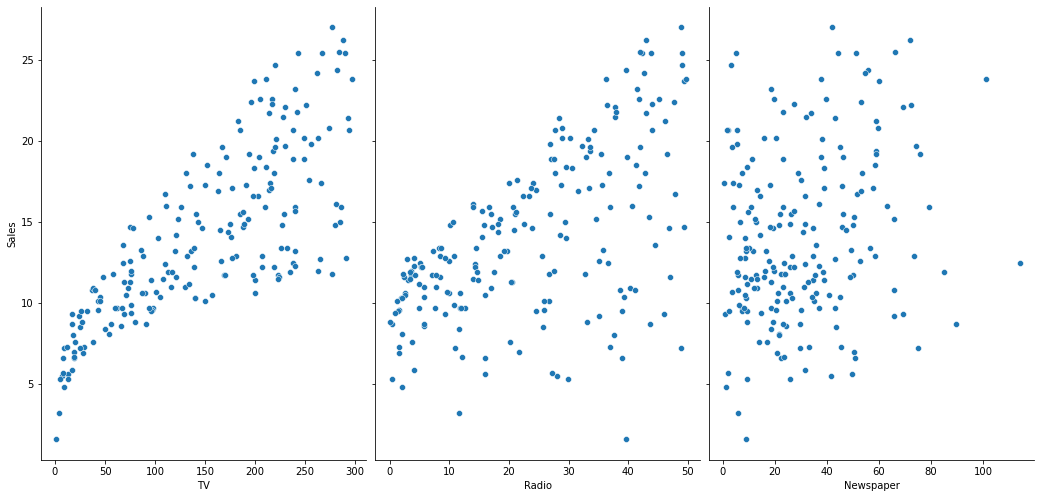

In [9]:
#visualize the relationship between the features and the response(Sales) using scatterplots
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

In [10]:
x=df.drop(["Sales"],axis=1)
y=df.Sales

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [14]:
print(("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred))))

R squared: 0.9072183330817297


# 2.residulas are normally distributed with mean zero

In [15]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.217248937900876e-16


In [16]:
max(residuals)

2.9570160847464866

In [17]:
min(residuals)

-4.437111043802627

In [18]:
type(residuals)

numpy.ndarray

In [19]:
!pip install scipy
from scipy.stats import skew


In [20]:
skew(residuals, axis=0, bias=True)

-0.7357661399109193

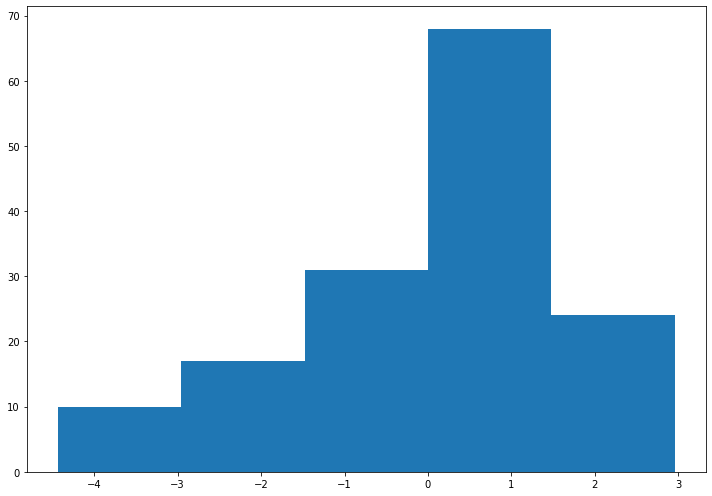

In [21]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(residuals, bins = 5)
 
# Show plot
plt.show()


# Check for Homoscedasticity

The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

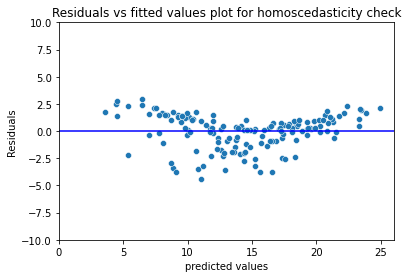

In [22]:
sns.scatterplot(y_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

Now we will be applying tests.

# Goldfeld Quandt Test

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic.

Alternative Hypothesis: Error terms are heteroscedastic.

In [23]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)


[('F statistic', 1.1095600395272505), ('p-value', 0.33016677253163385)]

since p-value>0.05,   we have failed to reject H0.

# Breusch–Pagan test

In [24]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_breuschpagan(residuals, X_train)
lzip(name, test)


[('F statistic', 4.416470960401547), ('p-value', 0.10989438836043325)]

# Check for Normality of error terms/residuals

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality of error terms/residuals')

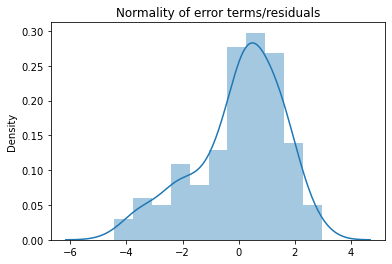

In [25]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')


# No autocorrelation of residuals

Autocorrelation: The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients. Let’s understand narrow prediction intervals with an example:

For example, the least square coefficient of X¹ is 15.02 and its standard error is 2.08 (without autocorrelation). But in presence of autocorrelation, the standard error reduces to 1.20. As a result, the prediction interval narrows down to (13.82, 16.22) from (12.94, 17.10).

Also, lower standard errors would cause the associated p-values to be lower than actual. This will make us incorrectly conclude a parameter to be statistically significant.

How to check: Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

# graphical method
There should not be autocorrelation in the data so the error terms should not form any pattern.

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


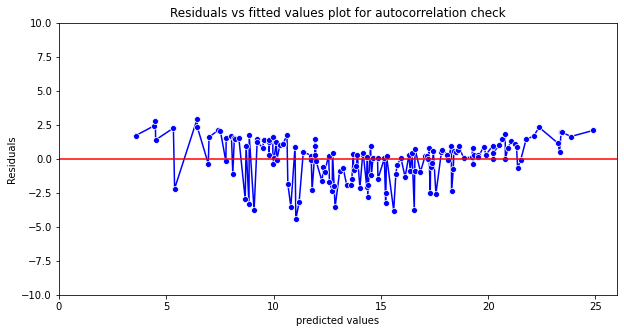

In [26]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [52]:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(residuals)
dw

2.055498930463609

In [53]:
import statsmodels.api as sm


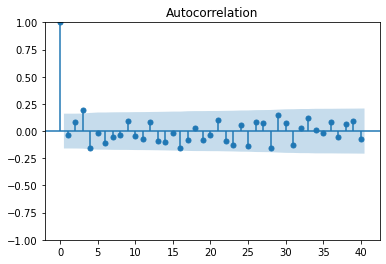

In [54]:
#autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

C:\Users\welcome\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


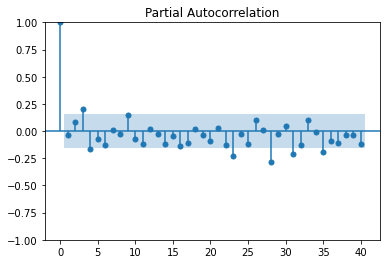

In [55]:
#partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data

# No perfect multicollinearity

Multicollinearity: This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters.

Also, when predictors are correlated, the estimated regression coefficient of a correlated variable depends on which other predictors are available in the model. If this happens, you’ll end up with an incorrect conclusion that a variable strongly / weakly affects target variable. Since, even if you drop one correlated variable from the model, its estimated regression coefficients would change. That’s not good!



<AxesSubplot:>

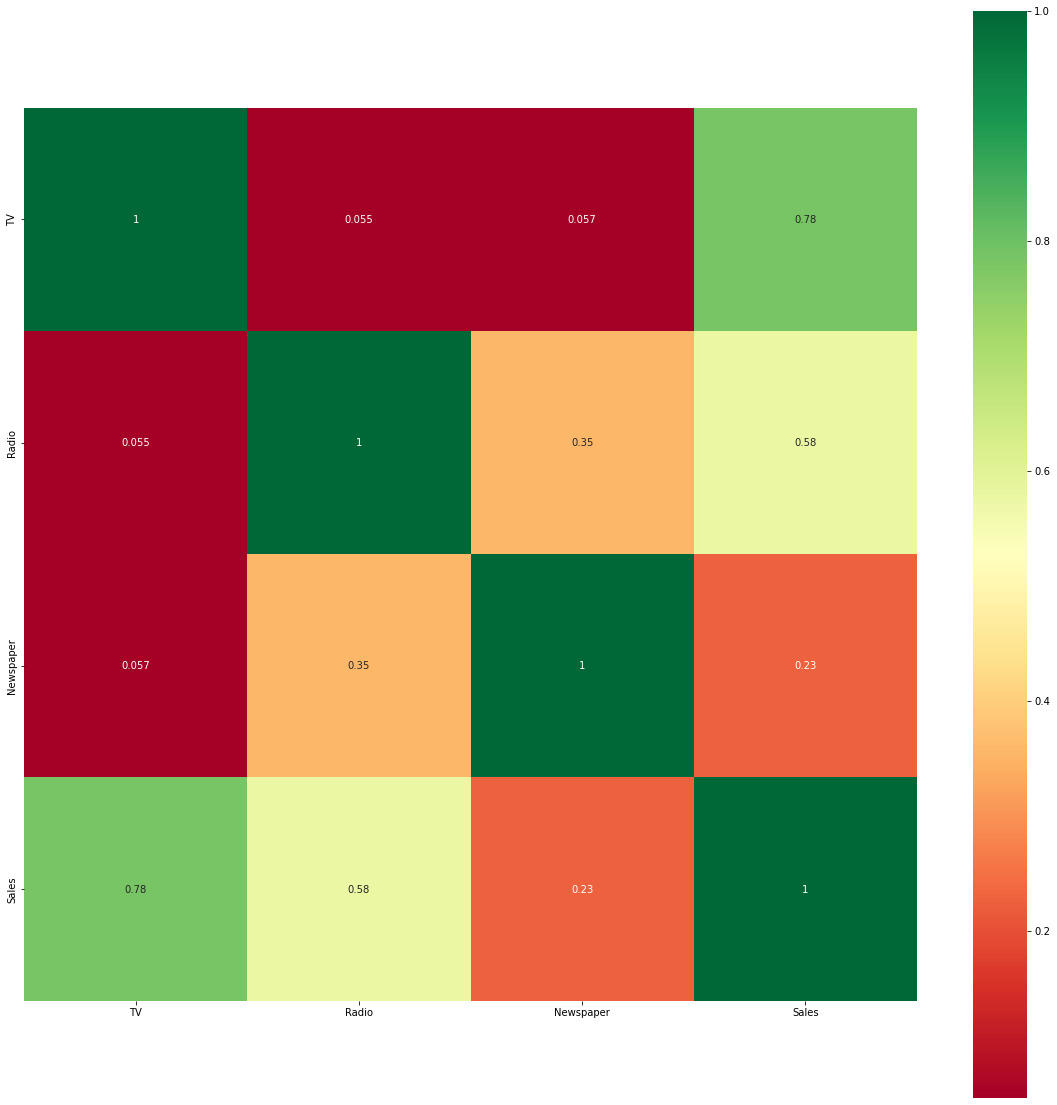

In [57]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap